## Reading the Dataset

In [1]:
# Importing dependencies
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Setting up path to read/view pictures
dataset_dir = 'Dataset\cell_images'
parasitized_dir = os.path.join(dataset_dir, 'Parasitized')
uninfected_dir = os.path.join(dataset_dir, 'Uninfected')

In [3]:
# Create & Display images
def display_images(folder):
    plt.figure(figsize=(18,18))
    
    # Display the first 5 images
    for i, filename in enumerate(os.listdir(folder)[:5]):  
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        plt.subplot(1, 5, i + 1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

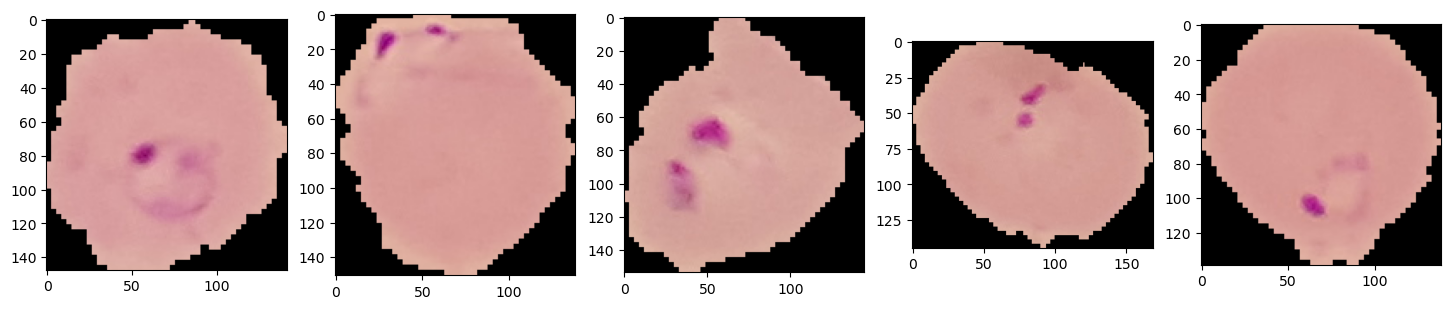

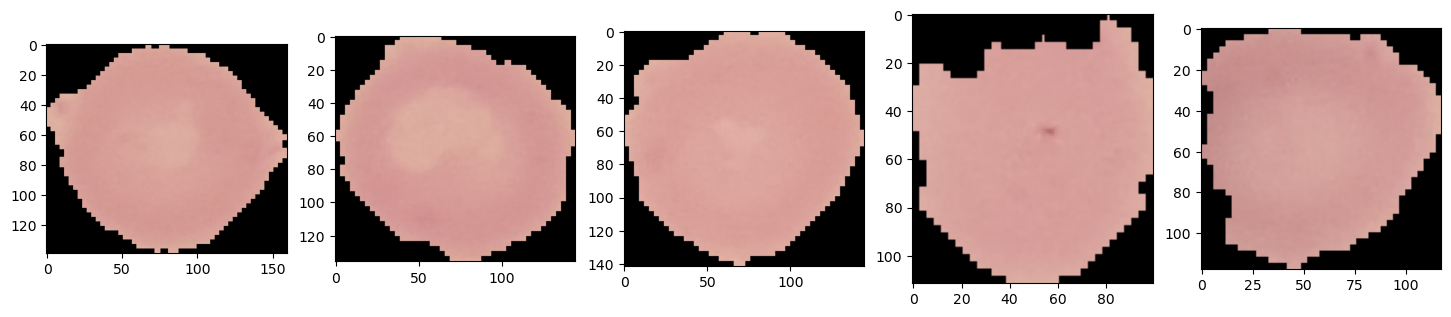

In [4]:
# Call the display_images function for both "parasitized" and "uninfected" folders to visualize the images
display_images(parasitized_dir)
display_images(uninfected_dir)

## Image Pre-Processing
## Splitting data into Training, Validation and Test

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

### Uninfected Images

In [6]:
from PIL import Image
import os

# Input and output folder paths
input_folder = "Dataset\\cell_images\\Uninfected"
output_folder = "Dataset\\clean"

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Create subfolders for training and testing
train_folder = os.path.join(output_folder, "train", "uninfected_processed")
test_folder = os.path.join(output_folder, "test", "uninfected_processed")

os.makedirs(train_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)

# List all files in the input folder
files = os.listdir(input_folder)

# Calculate the number of images for training and testing
num_train = 1750
num_test = 750

# Initialize counters for processed images in training and testing sets
processed_train_images = 0
processed_test_images = 0

# Loop through each file in the input folder
for file in files:
    # Check if the file is an image 
    if file.endswith((".png")):
        # Open the image
        image_path = os.path.join(input_folder, file)
        image = Image.open(image_path)

        # Resize the image to 25x25 pixels
        new_size = (25, 25)
        resized_image = image.resize(new_size)

        # Determine whether to save in the training or testing folder
        if processed_train_images < num_train:
            output_path = os.path.join(train_folder, file)
            processed_train_images += 1
        elif processed_test_images < num_test:
            output_path = os.path.join(test_folder, file)
            processed_test_images += 1
        else:
            break

        # Save the resulting image in the appropriate folder with the same filename
        resized_image.save(output_path)

print("Resizing and distribution complete with 1750 images in the training folder and 750 images in the test folder.")


Resizing and distribution complete with 1750 images in the training folder and 750 images in the test folder.


### Infected Images

In [7]:
# Input and output folder paths
input_folder = "Dataset\\cell_images\\Parasitized"
output_folder = "Dataset\\clean"

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Create subfolders for training and testing
train_folder = os.path.join(output_folder, "train", "infected_processed")
test_folder = os.path.join(output_folder, "test", "infected_processed")

os.makedirs(train_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)

# List all files in the input folder
files = os.listdir(input_folder)

# Calculate the number of images for training and testing
num_train = 1750
num_test = 750

# Initialize counters for processed images in training and testing sets
processed_train_images = 0
processed_test_images = 0

# Loop through each file in the input folder
for file in files:
    # Check if the file is an image 
    if file.endswith((".png")):
        # Open the image
        image_path = os.path.join(input_folder, file)
        image = Image.open(image_path)

        # Resize the image to 25x25 pixels
        new_size = (25, 25)
        resized_image = image.resize(new_size)

        # Determine whether to save in the training or testing folder
        if processed_train_images < num_train:
            output_path = os.path.join(train_folder, file)
            processed_train_images += 1
        elif processed_test_images < num_test:
            output_path = os.path.join(test_folder, file)
            processed_test_images += 1
        else:
            break

        # Save the resulting image in the appropriate folder with the same filename
        resized_image.save(output_path)

print("Resizing and distribution complete with 1750 images in the training folder and 750 images in the test folder.")

Resizing and distribution complete with 1750 images in the training folder and 750 images in the test folder.


## Using Xception over a Pre-Trained  dataset: 'Imagenet'

In [6]:
import os
import numpy as np
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Flatten, Dense


In [7]:
# Setting path for training and testing images
train_dir = "Dataset/clean/train"
test_dir = "Dataset/clean/test"

In [8]:
# Create data generators with data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest'
)


In [9]:
# Setting up data generators for training and testing images:
test_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 32

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(25,25),  
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(25,25),  
    batch_size=batch_size,
    class_mode='binary'
)

Found 3500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.


In [10]:
# Checking the array for each batch
batch_iterator = test_generator.next()
batch_iterator

(array([[[[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         [[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         [[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.47058827, 0.33333334, 0.32941177],
          [0.04313726, 0.03137255, 0.03137255],
          [0.        , 0.        , 0.        ]],
 
         ...,
 
         [[0.        , 0.        , 0.        ],
          [0.     

In [11]:
# Create the Xception base model with pre-trained weights
base_model = Xception(weights='imagenet', include_top=False)

In [12]:
# Add a custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

In [13]:
# Combine the base model and the custom head
model = Model(inputs=base_model.input, outputs=predictions)

In [14]:
# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

In [25]:
# Compile the model
model.compile(optimizer=Adam(lr=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [16]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=20, 
    validation_data=test_generator,
    validation_steps=len(test_generator)
)

Epoch 1/20
110/110 [==============================] - 15s 111ms/step - loss: 0.6207 - accuracy: 0.6597 - val_loss: 0.5611 - val_accuracy: 0.7200
Epoch 2/20
110/110 [==============================] - 13s 114ms/step - loss: 0.5614 - accuracy: 0.7134 - val_loss: 0.5222 - val_accuracy: 0.7673
Epoch 3/20
110/110 [==============================] - 13s 121ms/step - loss: 0.5438 - accuracy: 0.7271 - val_loss: 0.5551 - val_accuracy: 0.7307
Epoch 4/20
110/110 [==============================] - 15s 133ms/step - loss: 0.5301 - accuracy: 0.7380 - val_loss: 0.4994 - val_accuracy: 0.7707
Epoch 5/20
110/110 [==============================] - 15s 132ms/step - loss: 0.5275 - accuracy: 0.7360 - val_loss: 0.5472 - val_accuracy: 0.7493
Epoch 6/20
110/110 [==============================] - 15s 138ms/step - loss: 0.5265 - accuracy: 0.7414 - val_loss: 0.4904 - val_accuracy: 0.7853
Epoch 7/20
110/110 [==============================] - 16s 141ms/step - loss: 0.5207 - accuracy: 0.7466 - val_loss: 0.4966 - val_ac

In [26]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator)
print("Test accuracy: {:.2f}%".format(test_accuracy * 100))

47/47 [==============================] - 4s 55ms/step - loss: 0.6916 - accuracy: 0.4413
Test accuracy: 44.13%


In [ ]:
# Save the trained model to a file
model.save('xception_model.h5')

In [27]:
# Save the trained model to a file
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, None, None, 32)       864       ['input_2[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, None, None, 32)       128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activati  (None, None, None, 32)       0         ['block1_conv1_bn[0][0]'

## Visualizing Loss vs Accuracy

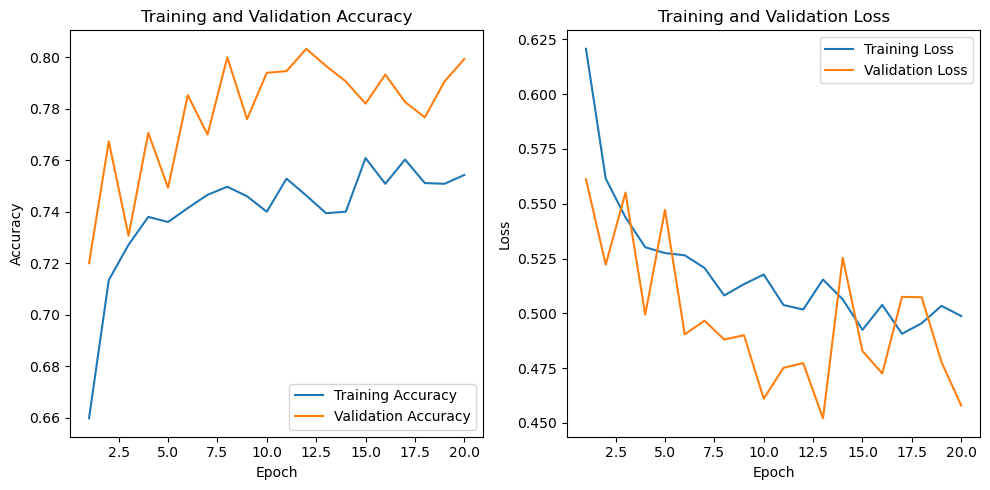

In [38]:
import matplotlib.pyplot as plt

# Extract training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Create a single figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot training and validation accuracy
ax1.plot(epochs, acc, label='Training Accuracy')
ax1.plot(epochs, val_acc, label='Validation Accuracy')
ax1.set_title('Training and Validation Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()

# Plot training and validation loss
ax2.plot(epochs, loss, label='Training Loss')
ax2.plot(epochs, val_loss, label='Validation Loss')
ax2.set_title('Training and Validation Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()

plt.tight_layout()
plt.show()


## Fine Tuning the pre-trained model

In [21]:
# Load the Xception base model with pre-trained weights
from tensorflow.keras.applications import Xception

base_model = Xception(weights='imagenet', include_top=False)

In [22]:
# Create a new top model for custom classification

# Connect to the output of the base model
top_model = base_model.output  
top_model = keras.layers.GlobalAveragePooling2D()(top_model)  
top_model = keras.layers.Dense(1024, activation='relu')(top_model) 

# Final classification layer with 'num_classes' classes
output_layer = keras.layers.Dense(1, activation='sigmoid')(top_model)  

# Combine the base model and the top model
model = keras.models.Model(inputs=base_model.input, outputs=output_layer)

In [23]:
# Freeze some layers in the base model
for layer in base_model.layers:
    layer.trainable = False

In [28]:
# Compile the model with loss, optimizer, and metrics
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [29]:
# Setting up data generators for training and testing images:
test_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 32

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(25,25),  
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(25,25),  
    batch_size=batch_size,
    class_mode='binary'
)

Found 3500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.


In [30]:
# Train the model with your dataset
model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10, 
    validation_data=test_generator,
    validation_steps=len(test_generator))

Epoch 1/10
110/110 [==============================] - 14s 105ms/step - loss: 0.6216 - accuracy: 0.6557 - val_loss: 0.5391 - val_accuracy: 0.7827
Epoch 2/10
110/110 [==============================] - 13s 115ms/step - loss: 0.5605 - accuracy: 0.7120 - val_loss: 0.4834 - val_accuracy: 0.7867
Epoch 3/10
110/110 [==============================] - 14s 131ms/step - loss: 0.5558 - accuracy: 0.7037 - val_loss: 0.4901 - val_accuracy: 0.7873
Epoch 4/10
110/110 [==============================] - 14s 129ms/step - loss: 0.5344 - accuracy: 0.7309 - val_loss: 0.5119 - val_accuracy: 0.7993
Epoch 5/10
110/110 [==============================] - 14s 130ms/step - loss: 0.5231 - accuracy: 0.7397 - val_loss: 0.5216 - val_accuracy: 0.7760
Epoch 6/10
110/110 [==============================] - 14s 130ms/step - loss: 0.5208 - accuracy: 0.7380 - val_loss: 0.4835 - val_accuracy: 0.7853
Epoch 7/10
110/110 [==============================] - 15s 138ms/step - loss: 0.5207 - accuracy: 0.7460 - val_loss: 0.4998 - val_ac

In [31]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator)
print("Test accuracy: {:.2f}%".format(test_accuracy * 100))

47/47 [==============================] - 3s 56ms/step - loss: 0.5271 - accuracy: 0.7700
Test accuracy: 77.00%


In [32]:
# Save the trained model to a file
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, None, None, 32)       864       ['input_2[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, None, None, 32)       128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activati  (None, None, None, 32)       0         ['block1_conv1_bn[0][0]'

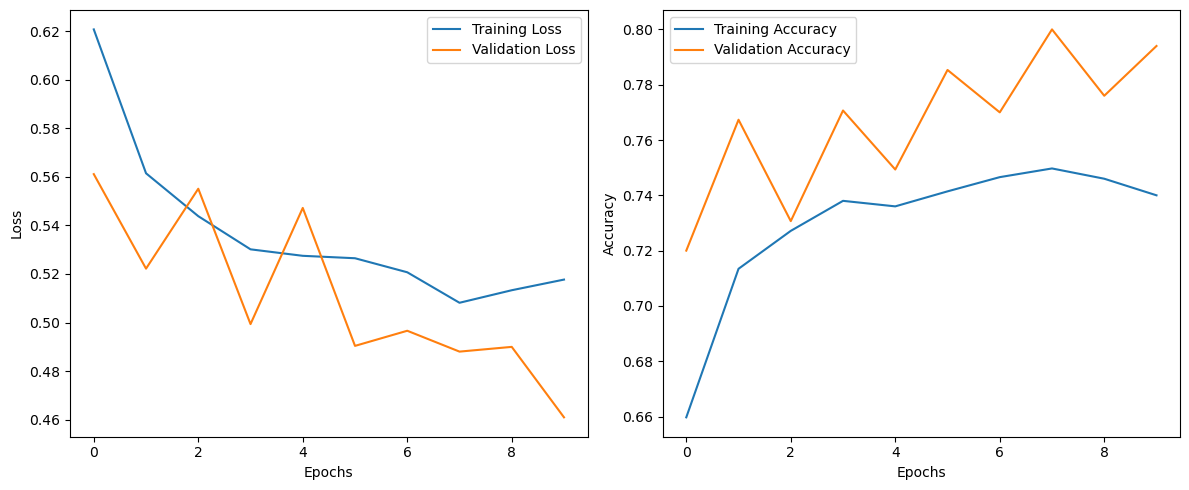

In [40]:
# Plot loss vs accuracy for the 10 epochs
plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'][:10], label='Training Loss')
plt.plot(history.history['val_loss'][:10], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'][:10], label='Training Accuracy')
plt.plot(history.history['val_accuracy'][:10], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()